# pinnPotentialFoam - grid search analysis

Variation  0
Variation  1
Variation  2
Variation  3
Variation  4
Variation  5
Variation  6
Variation  7
Variation  8
Variation  9
Variation  10
Variation  11
Variation  12
Variation  13
Variation  14
Variation  15
Variation  16
Variation  17
Variation  18
Variation  19
Variation  20
Variation  21
Variation  22
Variation  23
Optimal hyperparameters :
        HIDDEN_LAYERS  OPTIMIZER_STEP  MAX_ITERATIONS   DELTA_X  EPOCH  \
2945  20,20,20,20,20           0.001            3000  0.078302   2946   

      DATA_MSE  GRAD_MSE  TRAINING_MSE  TRAINING_ID  
2945  0.005931  0.001765      0.007696            9  


Text(0, 0.5, 'Training MSE')

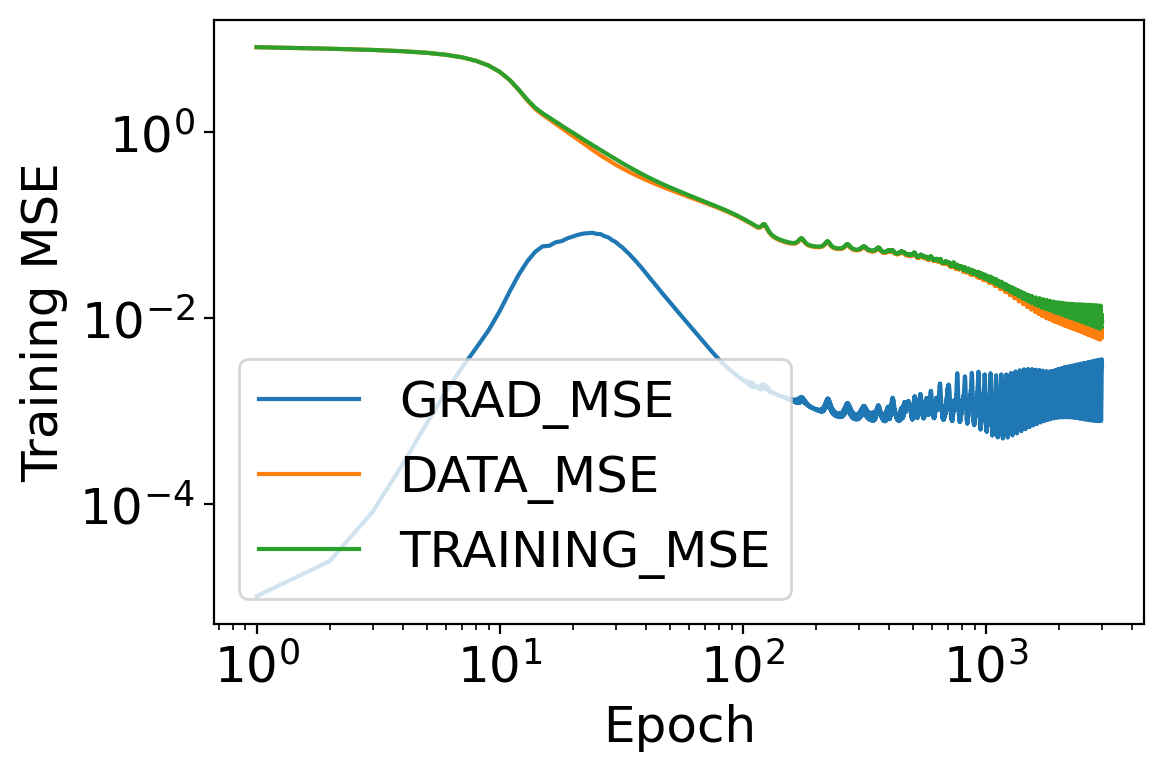

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from matplotlib import rcParams
import os
rcParams["figure.dpi"] = 200
rcParams["font.size"] = 18

file_pattern = "pinnPotentialFoam"
file_extension = "csv"
data_files = [file for file in os.listdir(os.curdir) if
              file_pattern in file and 
              file.endswith(file_extension) and 
              "global-dframe" not in file]                            
data_files.sort()

# Concat data_files in a dframe that contains everything
global_dframe = pd.DataFrame()
for i,file in enumerate(data_files):
    print ("Variation ", i)
    df = pd.read_csv(file)
    # Insert the study metadata information into the dataframe.
    df["TRAINING_ID"] = i
    global_dframe = pd.concat([global_dframe,df])
        
# Write global_dframe as csv
global_dframe.to_csv(file_pattern + "-global-dframe.csv")
    
# Optimal parameters = row in the global data frame with minimal validation MSE mean
optimal_hyperparams = global_dframe.loc[global_dframe["TRAINING_MSE"] == 
                                        global_dframe["TRAINING_MSE"].min()]
   
print("Optimal hyperparameters :\n", optimal_hyperparams) 

optimal_file_name = data_files[optimal_hyperparams["TRAINING_ID"].iloc[0]]
optimal_dframe = pd.read_csv(optimal_file_name)
plt.plot(optimal_dframe["EPOCH"], optimal_dframe["GRAD_MSE"], label="GRAD_MSE")
plt.plot(optimal_dframe["EPOCH"], optimal_dframe["DATA_MSE"], label="DATA_MSE")
plt.plot(optimal_dframe["EPOCH"], optimal_dframe["TRAINING_MSE"], label="TRAINING_MSE")
plt.loglog()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Training MSE")

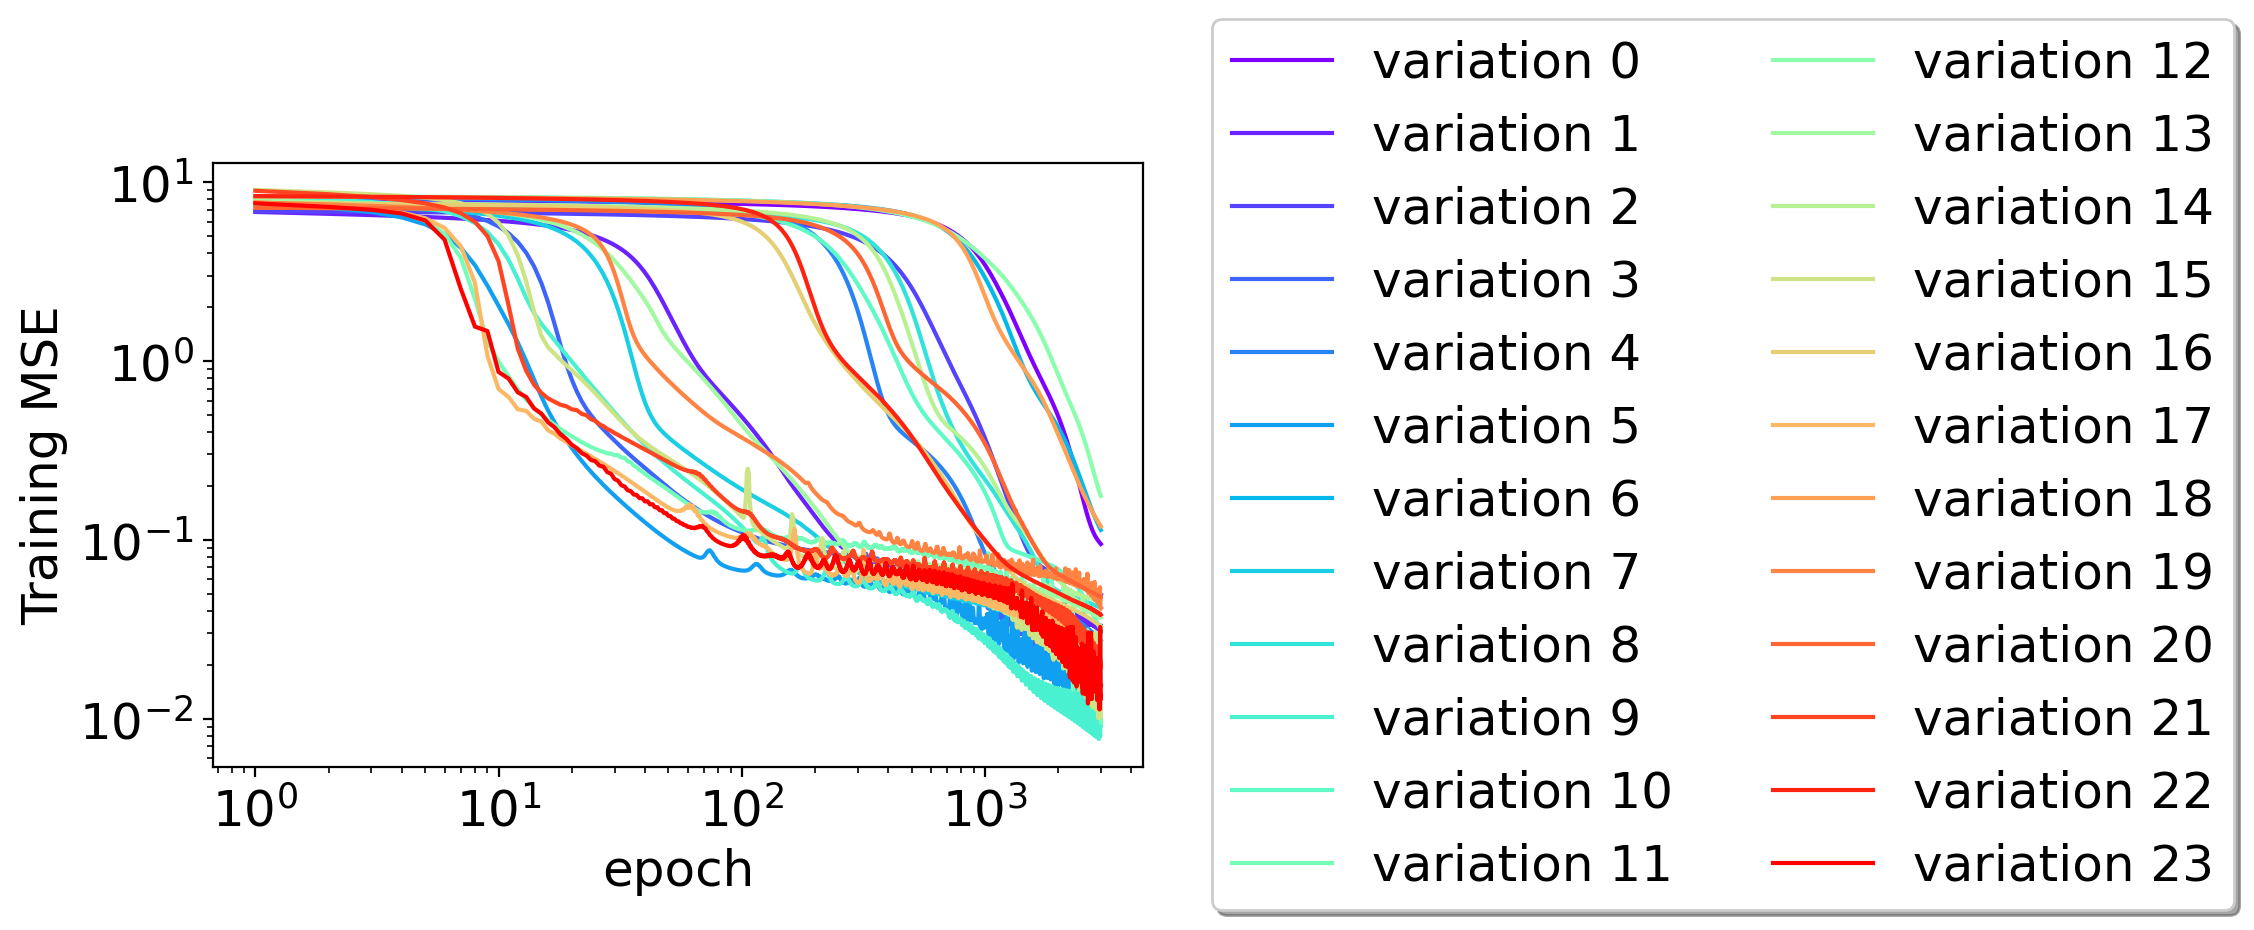

In [2]:
# Plot mse over epochs

color = iter(cm.rainbow(np.linspace(0, 1, len(data_files))))

for i in range(len(data_files)):
    training = global_dframe[global_dframe["TRAINING_ID"] == i]
    hidden_layers = training["HIDDEN_LAYERS"].unique()[0]
    optimizer_step = training["OPTIMIZER_STEP"].unique()[0]
    delta_x = training["DELTA_X"].unique()[0]
        
    c = next(color)

    plt.plot(training["EPOCH"], training["TRAINING_MSE"],c=c,
             #label = "%d TRAINING MSE, HIDDEN_LAYERS %s, LEARNING_RATE %s, DELTA_X %s" % 
             #(i, hidden_layers, optimizer_step, delta_x)
             label = f"variation {i}"
            )
    
plt.loglog()
plt.ylabel("Training MSE")
plt.xlabel("epoch")
plt.legend(loc='center right', bbox_to_anchor=(2.2, 0.5),
          fancybox=True, shadow=True, ncol=2)